In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
)


In [2]:
# Load best tuned model
model_path = Path("../models/logistic_regression.pkl")  
best_model = joblib.load(model_path)

# Load test data
test_df = pd.read_csv(Path("../data/processed/test.csv"))
target_col = "dropout_risk"
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

print("Test shape:", test_df.shape)


Test shape: (120, 5)


In [3]:
y_pred = best_model.predict(X_test)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.92      0.87      0.89        78

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



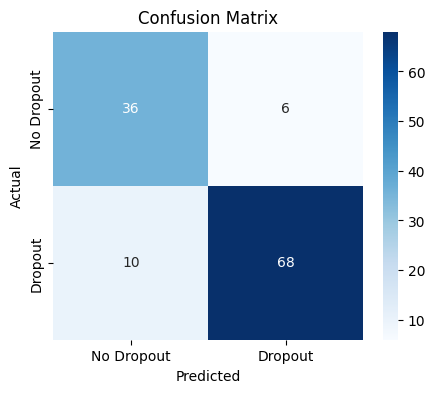

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Dropout", "Dropout"],
            yticklabels=["No Dropout", "Dropout"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


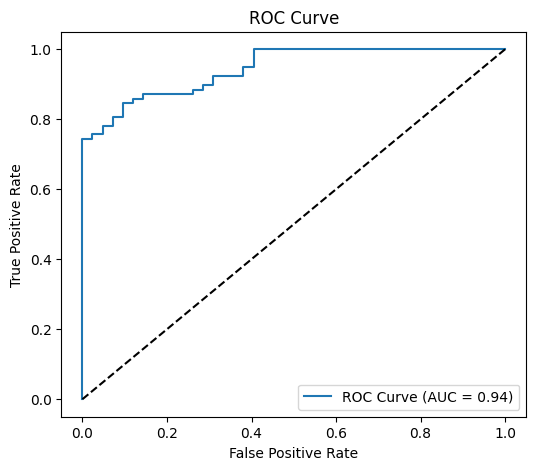

In [5]:
y_proba = best_model.predict_proba(X_test)[:,1]  # probability of dropout
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [6]:
if hasattr(best_model, "feature_importances_"):
    importance_df = pd.DataFrame({
        "Feature": X_test.columns,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x="Importance", y="Feature", data=importance_df)
    plt.title("Feature Importance")
    plt.show()
else:
    print("⚠️ Feature importance not available for this model.")


⚠️ Feature importance not available for this model.
